# NASA-FIRMS Boxplots
---
Dataset to be analyzed was retreived from NRT VIIRS 375 m Active Fire product VNP14IMGT distributed from NASA FIRM<br>
Please see `4-NASA_FIRMS--0fetch.ipynb` for data scraping and `4-NASA_FIRMS--1merge.ipynb` for data scrubbing

In [2]:
# Dependencies
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

## 1 Set Variables and Import Data
---

### Create Date Ranges by Day and by Month

In [ ]:
dt = [f'{str(x.date())}' for x in pd.date_range("2013-01-01", "2024-02-29", freq="D")]
mo = [f'{str(x.date())[0:7]}' for x in pd.date_range("2013-01-01", "2024-02-29", freq="ME")]

### Import Data from `4-NASA_FIRMS--1merge.ipynb`

In [67]:
df = pd.read_csv(f'../data/nasa-firms/all.csv').drop(columns=['latitude','longitude'])
df.insert(1,'cnt',1)

In [242]:
df.tail(1)

,acq_date,cnt,frp,bright_ti5,bright_ti4
918265,2024-07-09,1,4.64,300.79,340.33


## 2 Clean and Evaluate Data
---

### 2.1 Select Time Range

In [174]:
df[df['acq_date']=="2024-02-29"].tail(1)

,acq_date,cnt,frp,bright_ti5,bright_ti4
907145,2024-02-29,1,3.97,277.31,325.05


In [175]:
df0 = df.loc[:907145]

### 2.2 Check Quantiles

In [177]:
df0.frp.quantile([0.1, 0.25, 0.5, 0.75, 0.9])

0.10     0.95
0.25     1.72
0.50     4.08
0.75    11.25
0.90    30.68
Name: frp, dtype: float64

### 2.3 Check Gaussian Distributiions

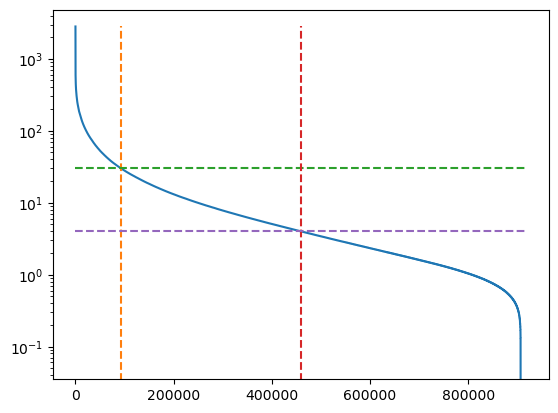

In [247]:
ax=df0.sort_values('frp',ascending=False).reset_index().frp.plot()
plt.plot([0.1*918265,0.1*918265],[0,df0.frp.max()],'--')
plt.plot([0,918265],[30.68,30.68],'--')
plt.plot([0.5*918265,0.5*918265],[0,df0.frp.max()],'--')
plt.plot([0,918265],[4.08,4.08],'--')
plt.yscale('log')
plt.show()

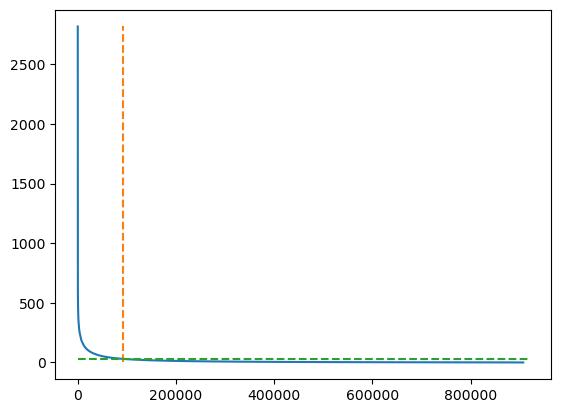

In [246]:
ax=df0.sort_values('frp',ascending=False).reset_index().frp.plot()
plt.plot([0.1*918265,0.1*918265],[0,df0.frp.max()],'--')
plt.plot([0,918265],[30.68,30.68],'--')
plt.show()

## 3 Bin Data
---

### 3.1 Bin Incident Values by Month

#### 3.1a FRP Values > 0

In [253]:
# Create dictionary for values
fdf00 = pd.DataFrame()
for m in mo:
    fdf00 = pd.concat( [fdf00, pd.Series( df[df.acq_date.str[0:7] == m]['frp'].to_list(), name=m)], axis=1)

#### 3.1b FRP Values > 5

In [252]:
df05 = df0[df0['frp']>5].reset_index(drop=True)
df05.tail(1)

,acq_date,cnt,frp,bright_ti5,bright_ti4
402494,2024-02-29,1,7.46,298.39,352.75


In [254]:
fdf05 = pd.DataFrame()
for m in mo:
    fdf05 = pd.concat( [fdf05, pd.Series( df05[df05.acq_date.str[0:7] == m]['frp'].to_list(), name=m)], axis=1)

In [255]:
fdf05.max().min()

32.73

#### 3.1c FRP Values > 32.73

In [256]:
df33 = df0[df0['frp']>=32.73].reset_index(drop=True)
df33.tail(1)

,acq_date,cnt,frp,bright_ti5,bright_ti4
84742,2024-02-15,1,81.41,294.52,340.31


In [257]:
fdf33 = pd.DataFrame()
for m in mo:
    fdf33 = pd.concat( [fdf33, pd.Series( df33[df33.acq_date.str[0:7] == m]['frp'].to_list(), name=m)], axis=1)

#### 3.1d FRP Values > 30.68

In [258]:
df31 = df0[df0['frp']>=30.68].reset_index(drop=True)
df31.tail(1)

,acq_date,cnt,frp,bright_ti5,bright_ti4
90720,2024-02-15,1,81.41,294.52,340.31


In [259]:
fdf31 = pd.DataFrame()
for m in mo:
    fdf31 = pd.concat( [fdf31, pd.Series( df31[df31.acq_date.str[0:7] == m]['frp'].to_list(), name=m)], axis=1)

### 3.2 Bin Daily Aggregates by Month

#### dfd: FRP Values > 0

In [260]:
df1 = df0.groupby('acq_date').sum()
df1.insert(2,'avg',df1['frp']/df1['cnt'])
df1.tail(1)

,cnt,frp,avg,bright_ti5,bright_ti4
acq_date,,,,,
2024-02-29,36,159.17,4.421389,10573.26,11908.89


In [261]:
dfd = {k:pd.DataFrame() for k in df1.columns}
for m in mo:
    for c in df1.columns:
        dfd[c] = pd.concat( [dfd[c], pd.Series( df1[df1.index.str[0:7] == m][c].to_list(), name=m)], axis=1)

In [262]:
dfd['avg'].index

RangeIndex(start=0, stop=31, step=1)

#### dfd33: FRP Values > 32.73

In [263]:
df33d = df33.groupby('acq_date').sum()
df33d.insert(2,'avg',df12['frp']/df12['cnt'])
df33d.tail(1)

,cnt,frp,avg,bright_ti5,bright_ti4
acq_date,,,,,
2024-02-15,1,81.41,81.41,294.52,340.31


In [265]:
dfd33 = {k:pd.DataFrame() for k in df33d.columns}
for m in mo:
    for c in df33d.columns:
        dfd33[c] = pd.concat( [dfd33[c], pd.Series( df33d[df33d.index.str[0:7] == m][c].to_list(), name=m)], axis=1)

#### dfd31: FRP Values > 30.68

In [266]:
df31d = df31.groupby('acq_date').sum()
df31d.insert(2,'avg',df13['frp']/df13['cnt'])
df31d.tail(1)

,cnt,frp,avg,bright_ti5,bright_ti4
acq_date,,,,,
2024-02-15,1,81.41,81.41,294.52,340.31


In [267]:
# Create dictionary for daily values
dfd31 = {k:pd.DataFrame() for k in df31d.columns}
for m in mo:
    for c in df31d.columns:
        dfd31[c] = pd.concat( [dfd31[c], pd.Series( df31d[df31d.index.str[0:7] == m][c].to_list(), name=m)], axis=1)

In [268]:
dfd31['avg'].index

RangeIndex(start=0, stop=31, step=1)

## 4 Boxplots
---

### 4.1 Chart Properties

In [269]:
flierprops = dict(marker='o', markerfacecolor='#999', markersize=3, markeredgecolor='none', alpha=0.4)
medianprops = dict(linestyle='-', linewidth=2.5, color='#fc7d00')
meanprops = dict(marker='o', markeredgecolor='none',markerfacecolor='#666', alpha=0.4)
# meanprops = dict(marker='D', markeredgecolor='none',markerfacecolor='#ffa425')
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#666", alpha=0.4)
capprops = dict(color="#999", linewidth = 2.5)

### 4.2 Incidents by Month -- Fire Radiative Power [fdfXX]

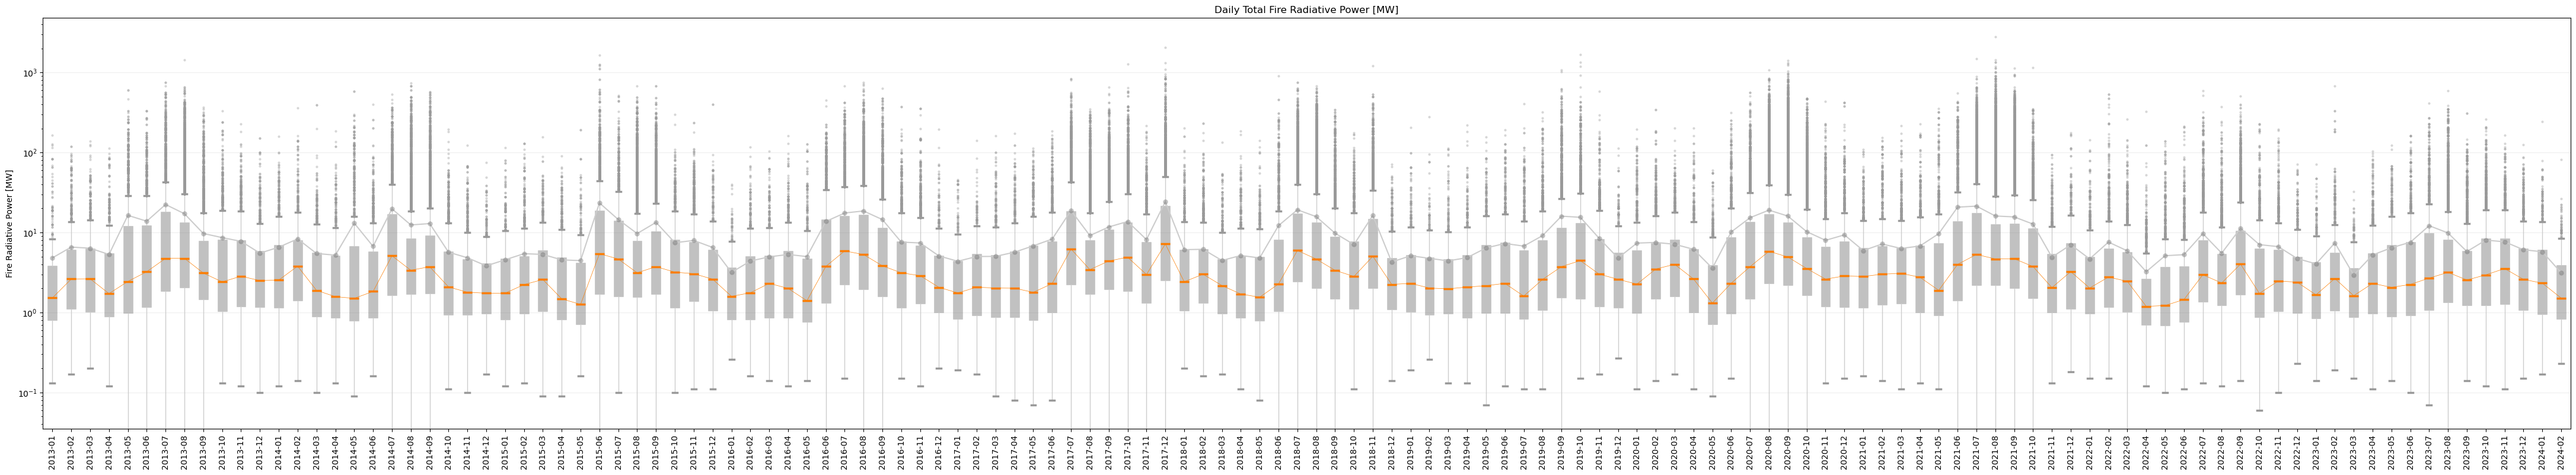

In [270]:
ax = fdf00.boxplot(
    ylabel='Fire Radiative Power [MW]',
    figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), 
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
ax.plot(list(range(1,len(fdf00.columns)+1)), fdf00.mean().to_list(), '#ccc')
ax.plot(list(range(1,len(fdf00.columns)+1)), [np.median(fdf00[x].dropna()) for x in fdf00.columns], '#fc7d00', linewidth=0.5, zorder=5)
plt.title('Daily Total Fire Radiative Power [MW]')
plt.xticks(rotation='vertical')
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../images/nasa-firms/boxplots/NASA-FIRMS_boxplot_FRP00.png')
plt.show()

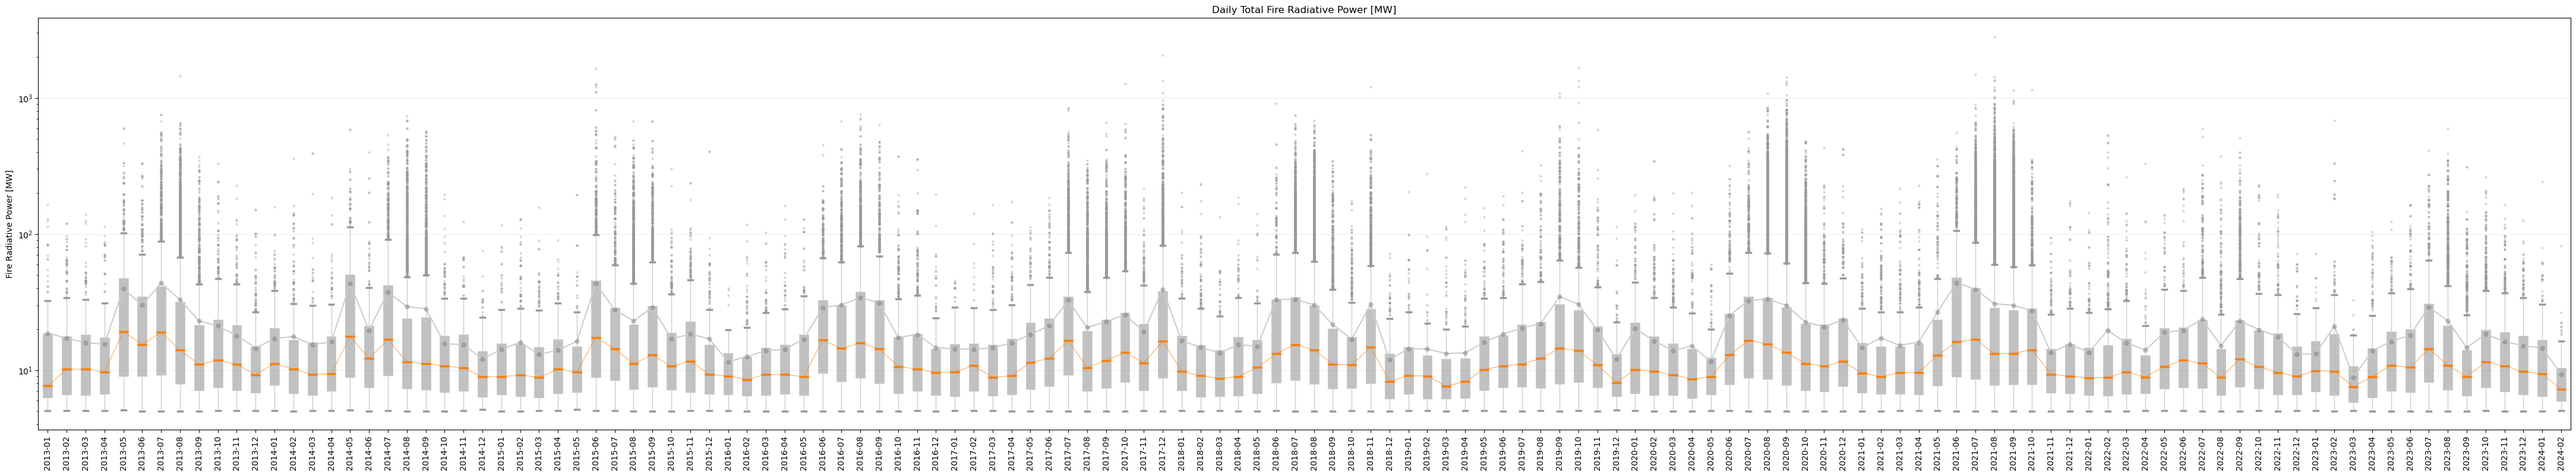

In [272]:
ax = fdf05.boxplot(
    ylabel='Fire Radiative Power [MW]',
    figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), 
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
ax.plot(list(range(1,len(fdf05.columns)+1)), fdf05.mean().to_list(), '#ccc')
ax.plot(list(range(1,len(fdf05.columns)+1)), [np.median(fdf05[x].dropna()) for x in fdf05.columns], '#fc7d00', linewidth=0.5, zorder=5)
plt.title('Daily Total Fire Radiative Power [MW]')
plt.xticks(rotation='vertical')
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../images/nasa-firms/boxplots/NASA-FIRMS_boxplot_FRP05.png')
plt.show()

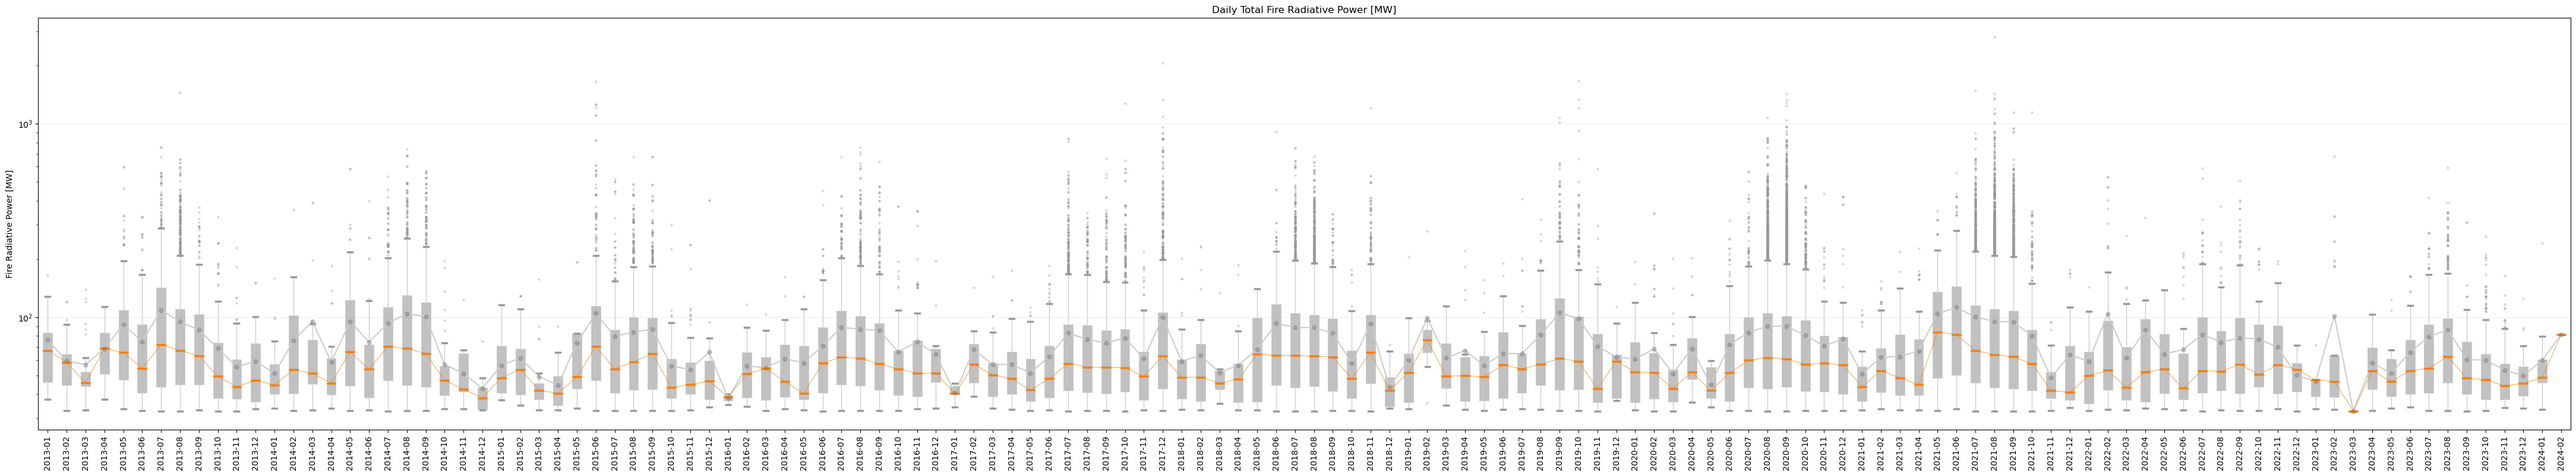

In [273]:
ax = fdf33.boxplot(
    ylabel='Fire Radiative Power [MW]',
    figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), 
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
ax.plot(list(range(1,len(fdf33.columns)+1)), fdf33.mean().to_list(), '#ccc')
ax.plot(list(range(1,len(fdf33.columns)+1)), [np.median(fdf33[x].dropna()) for x in fdf33.columns], '#fc7d00', linewidth=0.5, zorder=5)
plt.title('Daily Total Fire Radiative Power [MW]')
plt.xticks(rotation='vertical')
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../images/nasa-firms/boxplots/NASA-FIRMS_boxplot_FRP33.png')
plt.show()

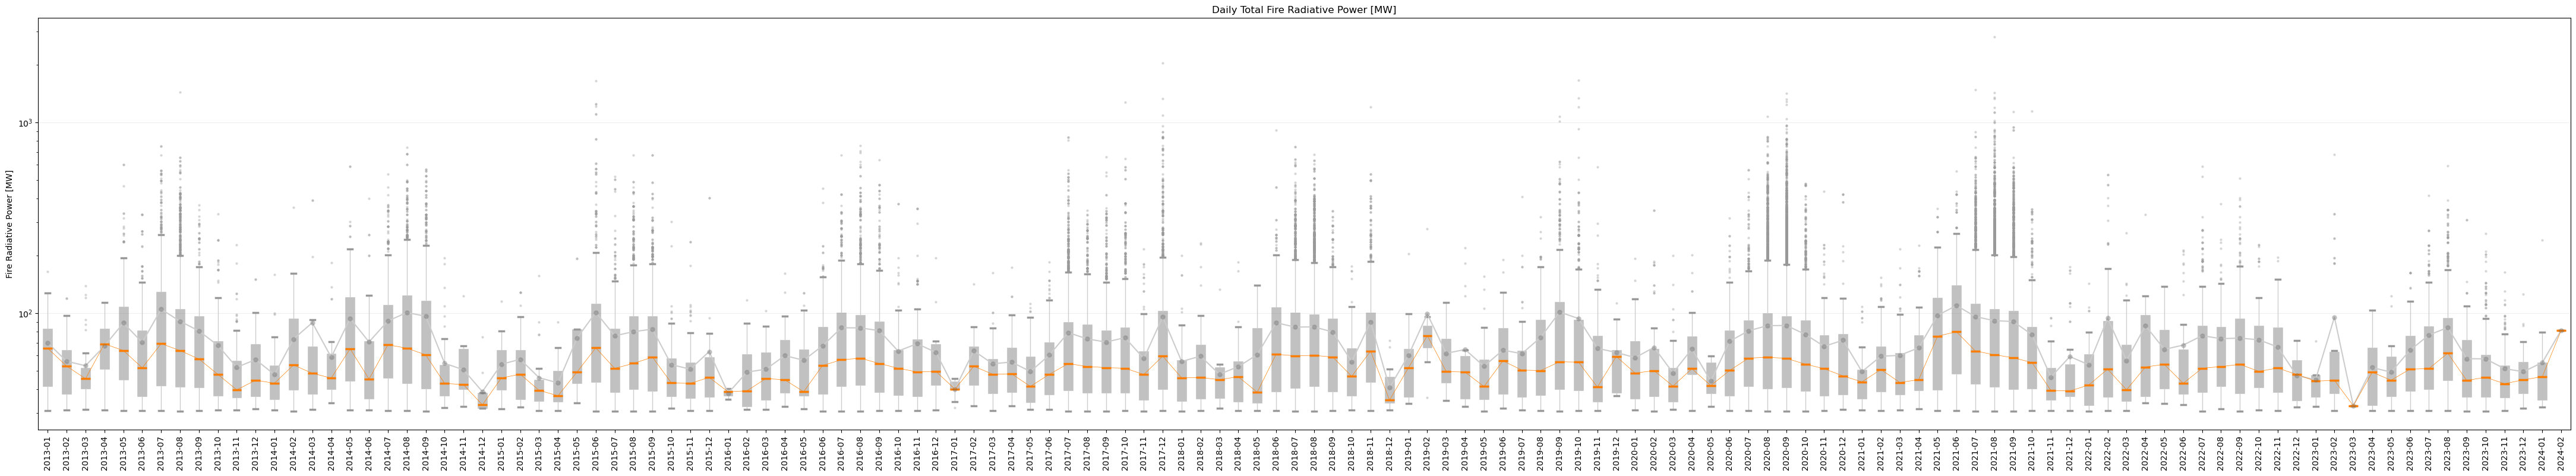

In [274]:
ax = fdf31.boxplot(
    ylabel='Fire Radiative Power [MW]',
    figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), 
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
ax.plot(list(range(1,len(fdf31.columns)+1)), fdf31.mean().to_list(), '#ccc')
ax.plot(list(range(1,len(fdf31.columns)+1)), [np.median(fdf31[x].dropna()) for x in fdf31.columns], '#fc7d00', linewidth=0.5, zorder=5)
plt.title('Daily Total Fire Radiative Power [MW]')
plt.xticks(rotation='vertical')
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../images/nasa-firms/boxplots/NASA-FIRMS_boxplot_FRP31.png')
plt.show()

### 4.2 Daily Aggegates by Month -- Average Fire Radiative Power by Area

#### Daily Average Fire Radiative Power by Area

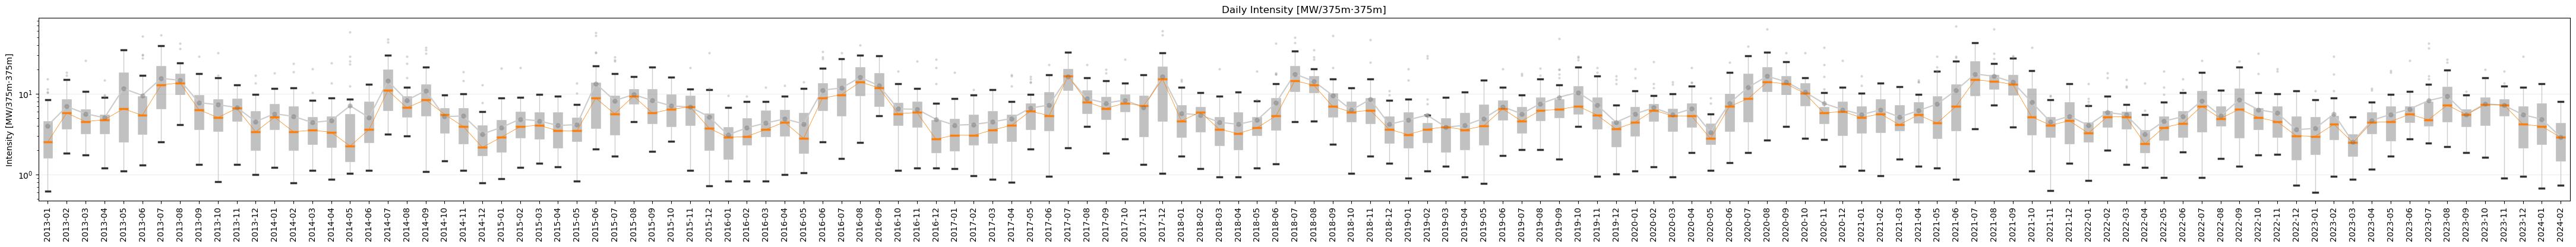

In [162]:
ax = dfd['int'].boxplot(
    ylabel='Intensity [MW/375m·375m]',
    figsize=(55,4.5), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), 
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
ax.plot(list(range(1,len(dfd['int'].columns)+1)), dfd['int'].mean().to_list(), '#ccc')
ax.plot(list(range(1,len(dfd['int'].columns)+1)), [np.median(dfd['int'][x].dropna()) for x in dfd['int'].columns], '#fc7d00', linewidth=0.5, zorder=5)
plt.title('Daily Average Fire Radiative Power by Area [MW/375m·375m]')
plt.xticks(rotation='vertical')
# plt.ylim([0.5,5000])
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../images/nasa-firms/boxplots/NASA-FIRMS_boxplot_FRP00_aggDavg.png')
plt.show()

### 4.3 Daily Aggregates by Month -- Combined Chart

#### FRP > 0

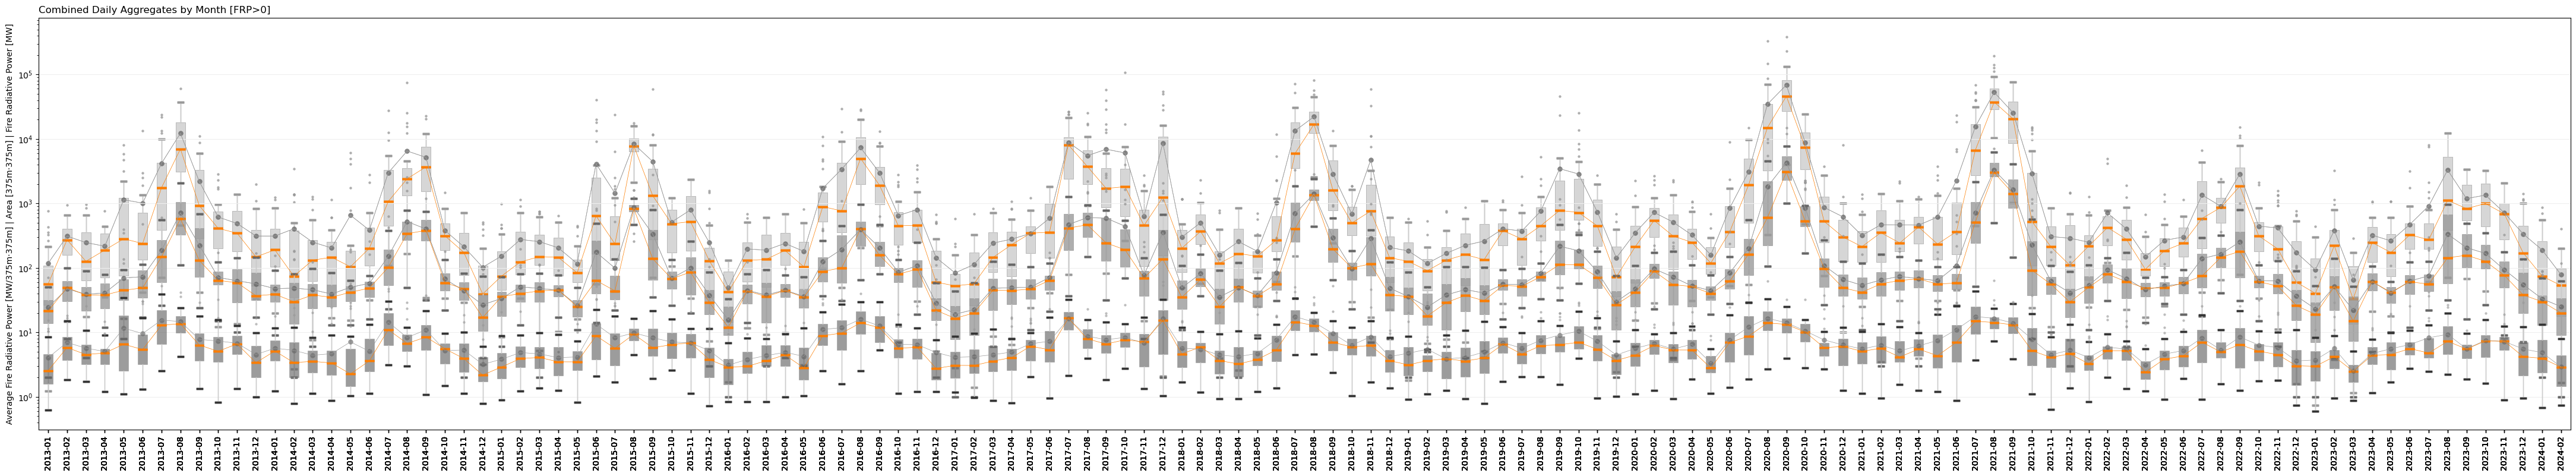

In [277]:
# FRP plot properties
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#ccc", alpha=0.4)
capprops = dict(color="#999", linewidth = 2.5)
# FRP plot (main aixs)
ax = dfd['frp'].boxplot(
    figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), zorder=1,
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
# CNT plot properties
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#999", alpha=0.4)
capprops = dict(color="#666", linewidth = 2.5)
# CNT plot
dfd['cnt'].boxplot( ax =ax,
    figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), zorder=2,
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
# AVG plot properties
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#666", alpha=0.4)
capprops = dict(color="#333", linewidth = 2.5)
# AVG plot
dfd['avg'].boxplot( ax=ax,
    figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), zorder=3,
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
# Line plot for means (equivalent for ttl bar plot)
ax.plot(list(range(1,len(dfd['frp'].columns)+1)),dfd['frp'].mean().to_list(), '#999', linewidth=0.5, zorder=4)
ax.plot(list(range(1,len(dfd['cnt'].columns)+1)),dfd['cnt'].mean().to_list(), '#999', linewidth=0.5, zorder=4)
ax.plot(list(range(1,len(dfd['avg'].columns)+1)),dfd['avg'].mean().to_list(), '#999', linewidth=0.5, zorder=4)
# Line plot for medians
ax.plot(list(range(1,len(dfd['frp'].columns)+1)), [np.median(dfd['frp'][x].dropna()) for x in dfd['frp'].columns], '#fc7d00', linewidth=0.5, zorder=5)
ax.plot(list(range(1,len(dfd['cnt'].columns)+1)), [np.median(dfd['cnt'][x].dropna()) for x in dfd['cnt'].columns], '#fc7d00', linewidth=0.5, zorder=5)
ax.plot(list(range(1,len(dfd['avg'].columns)+1)), [np.median(dfd['avg'][x].dropna()) for x in dfd['avg'].columns], '#fc7d00', linewidth=0.5, zorder=5)
# Text for plot
plt.title('Combined Daily Aggregates by Month [FRP>0]', loc='left')
plt.ylabel('Average Fire Radiative Power [MW/375m·375m] | Area [375m·375m] | Fire Radiative Power [MW]')
# Axis properties
plt.xticks(rotation='vertical')
plt.grid(axis='y',color='#eee')
plt.yscale("log")
# Plot Outputs
plt.savefig(f'../images/nasa-firms/boxplots/NASA-FIRMS_boxplot_FRP00_aggD.png')
plt.show()

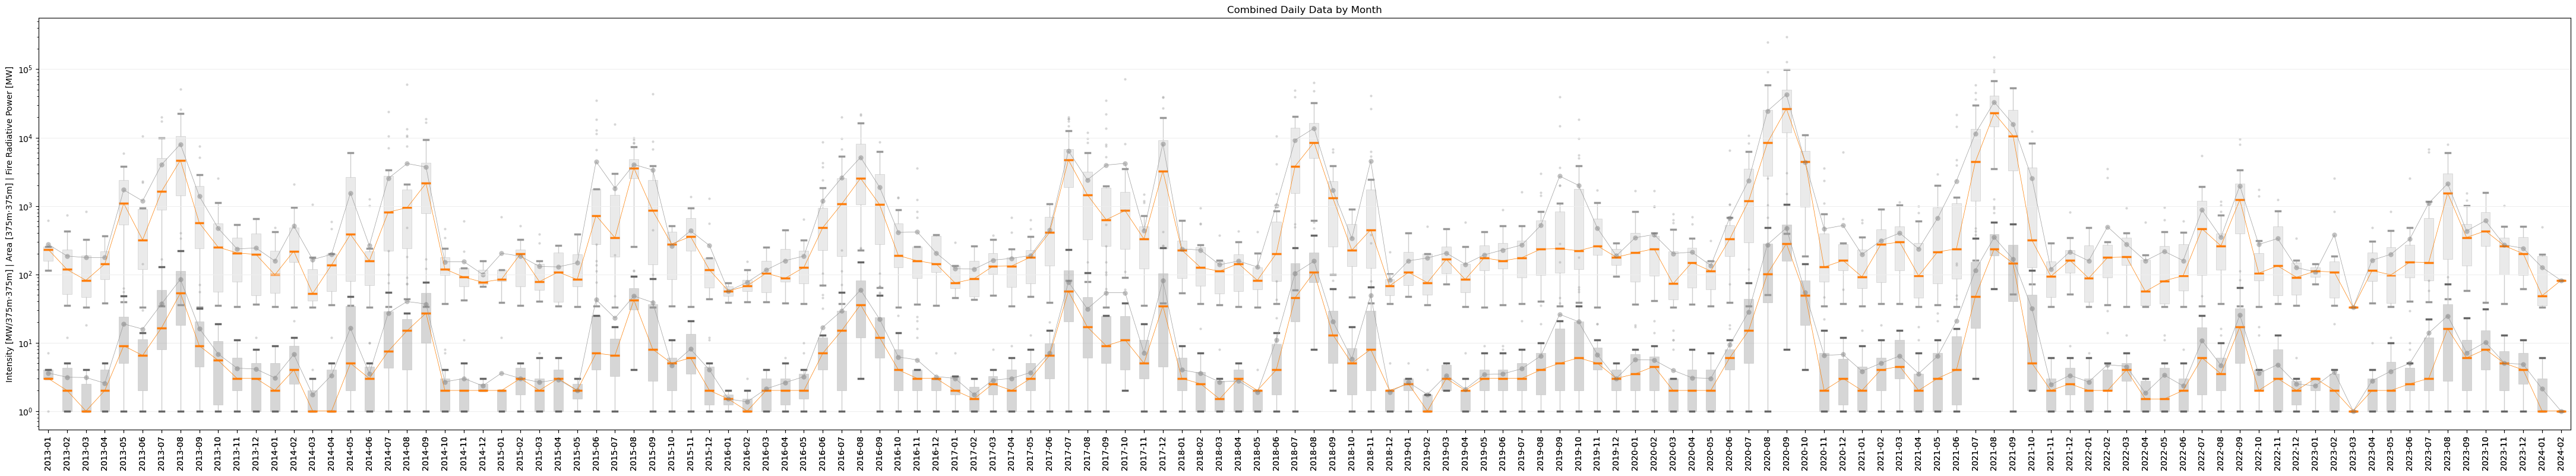

In [241]:
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#ccc", alpha=0.4)
capprops = dict(color="#999", linewidth = 2.5)
ax = dfd12['frp'].boxplot(
    figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), zorder=1,
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#999", alpha=0.4)
capprops = dict(color="#666", linewidth = 2.5)
dfd12['cnt'].boxplot( ax =ax,
    figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), zorder=2,
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#666", alpha=0.4)
capprops = dict(color="#333", linewidth = 2.5)
# dfd13['int'].boxplot( ax=ax,
#     figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), zorder=3,
#     boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
ax.plot(list(range(1,len(dfd12['frp'].columns)+1)),dfd12['frp'].mean().to_list(), '#999', linewidth=0.5, zorder=4)
ax.plot(list(range(1,len(dfd12['cnt'].columns)+1)),dfd12['cnt'].mean().to_list(), '#999', linewidth=0.5, zorder=4)
ax.plot(list(range(1,len(dfd12['frp'].columns)+1)), [np.median(dfd12['frp'][x].dropna()) for x in dfd12['frp'].columns], '#fc7d00', linewidth=0.5, zorder=5)
ax.plot(list(range(1,len(dfd12['cnt'].columns)+1)), [np.median(dfd12['cnt'][x].dropna()) for x in dfd12['cnt'].columns], '#fc7d00', linewidth=0.5, zorder=5)
plt.xticks(rotation='vertical')
plt.title('Combined Daily Data by Month')
plt.ylabel('Intensity [MW/375m·375m] | Area [375m·375m] | Fire Radiative Power [MW]')
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../images/nasa-firms/boxplots/NASA-FIRMS_boxplot_FRP05_aggD.png')
plt.show()

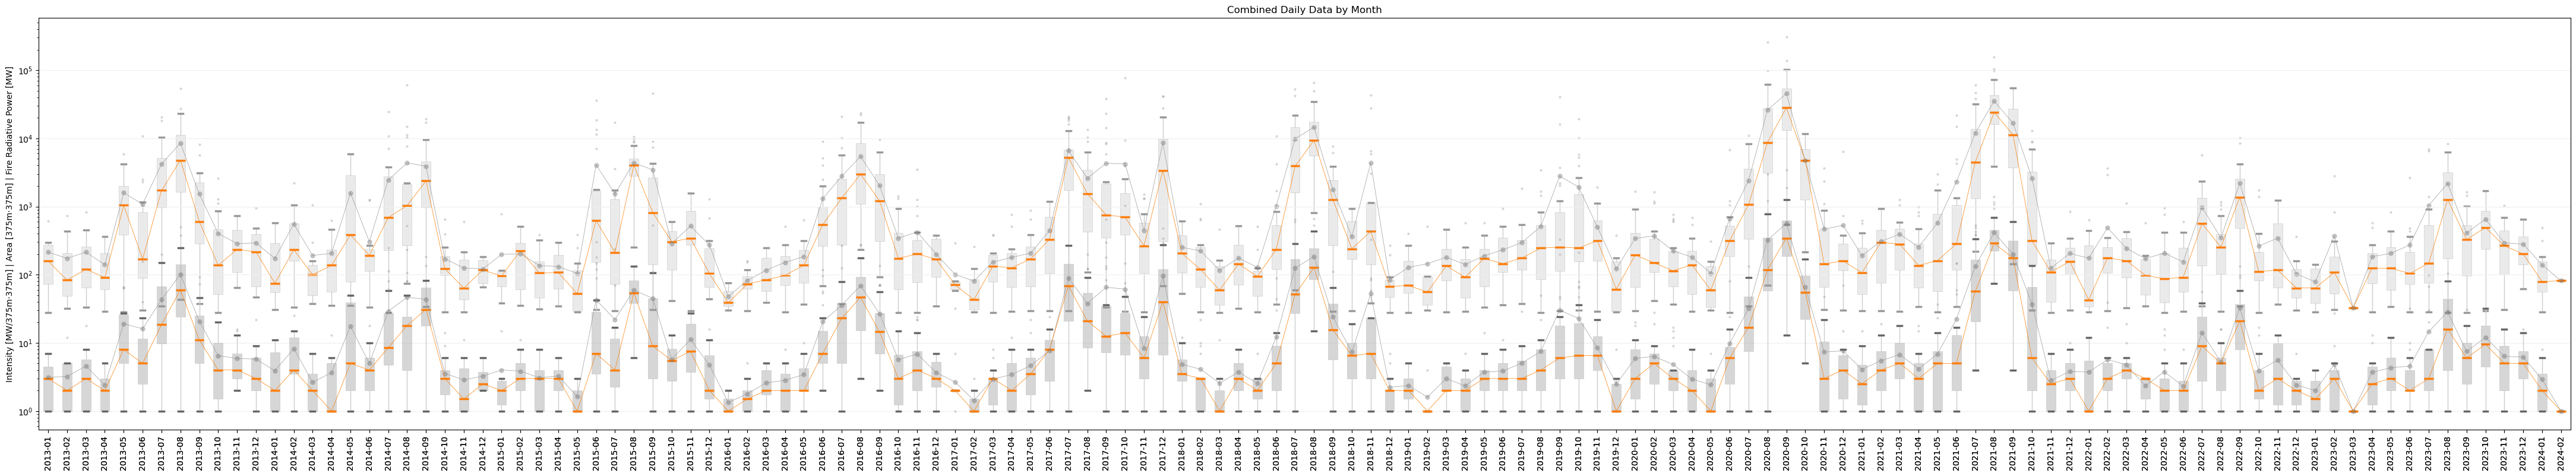

In [235]:
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#ccc", alpha=0.4)
capprops = dict(color="#999", linewidth = 2.5)
ax = dfd13['frp'].boxplot(
    figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), zorder=1,
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#999", alpha=0.4)
capprops = dict(color="#666", linewidth = 2.5)
dfd13['cnt'].boxplot( ax =ax,
    figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), zorder=2,
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#666", alpha=0.4)
capprops = dict(color="#333", linewidth = 2.5)
# dfd13['int'].boxplot( ax=ax,
#     figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), zorder=3,
#     boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
ax.plot(list(range(1,len(dfd13['frp'].columns)+1)),dfd13['frp'].mean().to_list(), '#999', linewidth=0.5, zorder=4)
ax.plot(list(range(1,len(dfd13['cnt'].columns)+1)),dfd13['cnt'].mean().to_list(), '#999', linewidth=0.5, zorder=4)
ax.plot(list(range(1,len(dfd13['frp'].columns)+1)), [np.median(dfd13['frp'][x].dropna()) for x in dfd13['frp'].columns], '#fc7d00', linewidth=0.5, zorder=5)
ax.plot(list(range(1,len(dfd13['cnt'].columns)+1)), [np.median(dfd13['cnt'][x].dropna()) for x in dfd13['cnt'].columns], '#fc7d00', linewidth=0.5, zorder=5)
plt.xticks(rotation='vertical')
plt.title('Combined Daily Data by Month')
plt.ylabel('Intensity [MW/375m·375m] | Area [375m·375m] | Fire Radiative Power [MW]')
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../images/nasa-firms/boxplots/NASA-FIRMS_boxplot_FRP27_aggD.png')
plt.show()